In [1]:
import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Path
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
pipeline_path = os.path.join(parent_dir, 'Pipeline')
sys.path.append(pipeline_path)

from build_a_pipeline import build_pipeline_P0_foward_price


In [9]:

x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, 
                                                                                remove_outliers = True,
                                                                                target_column = 'P1',
                                                                                percentage_of_outliers=0.01, 
                                                                                deal_with_skewness = False)

In [10]:
# Ensure the index is a datetime object
for dataset_name, dataset in zip(["x_train", "x_val", "X_test"], [x_train, x_val, X_test]):
    if not isinstance(dataset.index, pd.DatetimeIndex):
        raise ValueError(f"{dataset_name}'s index is not a DatetimeIndex. Please check your data.")
    
    # Check the time period
    start_date = dataset.index.min()
    end_date = dataset.index.max()
    print(f"{dataset_name}: Start Date = {start_date}, End Date = {end_date}")


x_train: Start Date = 2021-04-30 00:00:00, End Date = 2023-09-29 00:00:00
x_val: Start Date = 2023-10-02 00:00:00, End Date = 2024-04-10 00:00:00
X_test: Start Date = 2024-04-11 00:00:00, End Date = 2024-10-07 00:00:00


In [11]:
x_train.columns

Index(['P0', 'Min_Settlement_Price_SE(MWh)', 'Hydro_Inflow_N(MWavg)',
       'Hydro_Inflow_NE(MWavg)', 'Hydro_Inflow_S(MWavg)',
       'Hydro_Inflow_SE/CW(MWavg)', 'Daily_Sum_Hydro_Inflow(MWavg)',
       'Solar_Generated_Sum_NE(MWavg)', 'Solar_Generated_Sum_SE/CW(MWavg)',
       'Daily_Sum_Solar_Generated(MWavg)', 'Wind_Generation_N(MWavg)',
       'Wind_Generation_NE(MWavg)', 'Wind_Generation_S(MWavg)',
       'Wind_Generation_SUM(MWavg)', 'Hydroelectric_capacity_N(MWavg)',
       'Hydroelectric_capacity_SE/CW(MWavg)',
       'Hydroelectric_capacity_S(MWavg)', 'Thermal_capacity_NE(MWavg)',
       'Thermal_capacity_N(MWavg)', 'Thermal_capacity_SE/CW(MWavg)',
       'Thermal_capacity_S(MWavg)', 'Wind_capacity_NE(MWavg)',
       'Solar_capacity_NE(MWavg)', 'Solar_capacity_SE/CW(MWavg)',
       'Total_capacity_NE(MWavg)', 'Total_capacity_N(MWavg)',
       'Total_capacity_SE/CW(MWavg)', 'Total_capacity_S(MWavg)',
       'Consumption(MWh)_N', 'Consumption(MWh)_NE', 'Consumption(MWh)_S',
   

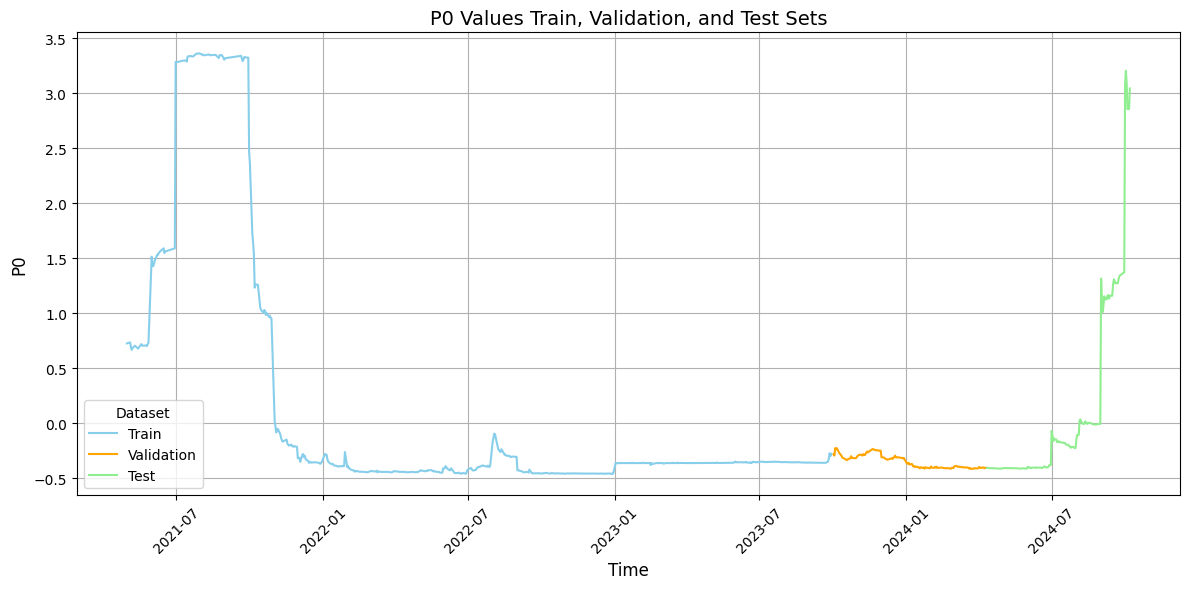

In [12]:
import matplotlib.pyplot as plt

# Add a column to identify the dataset source
x_train['Dataset'] = 'Train'
x_val['Dataset'] = 'Validation'
X_test['Dataset'] = 'Test'

# Combine all datasets
combined_data = pd.concat([x_train, x_val, X_test])

# Plot the P0 column with different colors for each dataset
plt.figure(figsize=(12, 6))

for dataset, color in zip(['Train', 'Validation', 'Test'], ['skyblue', 'orange', 'lightgreen']):
    subset = combined_data[combined_data['Dataset'] == dataset]
    plt.plot(subset.index, subset['P0'], label=dataset, color=color)

# Add labels, title, and legend
plt.title('P0 Values Train, Validation, and Test Sets', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('P0', fontsize=12)
plt.legend(title='Dataset', fontsize=10)
plt.grid(True)

# Format x-axis for dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
